# Classification with Neural Network for Yoga poses detection

## Import Dependencies 

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

## Getting the data (images) and labels

In [3]:
# Data path

train_dir = 'pose_recognition_data/dataset'

In [4]:
# Getting the folders name to be able to labelize the data

Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['adho mukha svanasana', 'adho mukha vriksasana', 'agnistambhasana', 'ananda balasana', 'anantasana', 'anjaneyasana', 'ardha bhekasana', 'ardha chandrasana', 'ardha matsyendrasana', 'ardha pincha mayurasana', 'ardha uttanasana', 'ashtanga namaskara', 'astavakrasana', 'baddha konasana', 'bakasana', 'balasana', 'bhairavasana', 'bharadvajasana i', 'bhekasana', 'bhujangasana', 'bhujapidasana', 'bitilasana', 'camatkarasana', 'chakravakasana', 'chaturanga dandasana', 'dandasana', 'dhanurasana', 'durvasasana', 'dwi pada viparita dandasana', 'eka pada koundinyanasana i', 'eka pada koundinyanasana ii', 'eka pada rajakapotasana', 'eka pada rajakapotasana ii', 'ganda bherundasana', 'garbha pindasana', 'garudasana', 'gomukhasana', 'halasana', 'hanumanasana', 'janu sirsasana', 'kapotasana', 'krounchasana', 'kurmasana', 'lolasana', 'makara adho mukha svanasana', 'makarasana', 'malasana', 'marichyasana i', 'marichyasana iii', 'marjaryasana', 'matsyasana', 'mayurasana', 'natarajasana', 'padangusthasan

In [6]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [7]:
dataset=[]
testset=[]
count=0
for file in os.listdir(train_dir):
    t=0
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        if t<60:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1
    count=count+1

C:\Users\rolin\anaconda3\envs\vision\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [9]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [10]:
# Transforming the into Numerical Data
data=np.array(data)
test=np.array(test)

In [11]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [12]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4495, 40, 40, 3)
(1124, 40, 40, 3)
(4495, 107)
(1124, 107)


In [13]:
# Data augmentation

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [14]:
# Loading the pretrained model , here DenseNet201
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [15]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(107, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50
141/141 [==============================] - 16s 112ms/step - loss: 4.5914 - accuracy: 0.0289 - val_loss: 4.3583 - val_accuracy: 0.0427
Epoch 2/50
141/141 [==============================] - 14s 101ms/step - loss: 4.2505 - accuracy: 0.0685 - val_loss: 3.9496 - val_accuracy: 0.0952
Epoch 3/50
141/141 [==============================] - 15s 103ms/step - loss: 3.9702 - accuracy: 0.0977 - val_loss: 3.7706 - val_accuracy: 0.1210
Epoch 4/50
141/141 [==============================] - 14s 101ms/step - loss: 3.8243 - accuracy: 0.1179 - val_loss: 3.6197 - val_accuracy: 0.1317
Epoch 5/50
141/141 [==============================] - 16s 110ms/step - loss: 3.7160 - accuracy: 0.1433 - val_loss: 3.5676 - val_accuracy: 0.1584
Epoch 6/50
141/141 [==============================] - 16s 115ms/step - loss: 3.6107 - accuracy: 0.1588 - val_loss: 3.4713 - val_accuracy: 0.1815
Epoch 7/50
141/141 [==============================] - 16s 117ms/step - loss: 3.5385 - accuracy: 0.1755 - val_loss: 3.4932 - val_ac

In [18]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.25      0.80      0.38         5
           1       0.00      0.00      0.00         9
           2       0.33      0.14      0.20         7
           3       0.27      0.27      0.27        11
           4       0.38      0.62      0.48         8
           5       0.14      0.15      0.15        13
           6       0.00      0.00      0.00         5
           7       0.60      0.38      0.46         8
           8       0.38      0.50      0.43        10
           9       0.42      0.50      0.45        10
          10       0.00      0.00      0.00        10
          11       0.43      0.33      0.38         9
          12       0.23      0.70      0.35        10
          13       0.17      0.12      0.14        17
          14       0.38      0.38      0.38         8
          15       0.40      0.20      0.27        10
          16       0.25      0.25      0.25        12
          17       0.00    

C:\Users\rolin\anaconda3\envs\vision\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rolin\anaconda3\envs\vision\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rolin\anaconda3\envs\vision\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


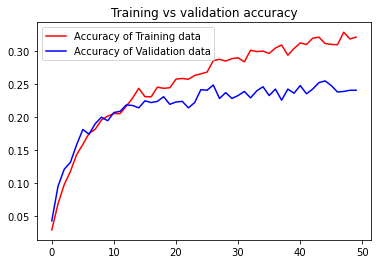

<Figure size 432x288 with 0 Axes>

In [19]:
#Checking accuracy of our model

get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

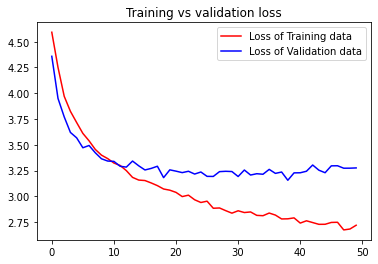

<Figure size 432x288 with 0 Axes>

In [20]:
# Checking the loss of data

epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

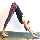

In [21]:
load_img("pose_recognition_data/dataset/adho mukha svanasana/95. downward-facing-dog-pose.png",target_size=(40,40))

In [22]:
image = load_img("pose_recognition_data/dataset/adho mukha svanasana/95. downward-facing-dog-pose.png",target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [27]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is adho mukha svanasana.


In [24]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(375, 40, 40, 3)
(375, 107)


In [25]:
ANS=testlabels0

In [26]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.27466666666666667
